In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')



In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In this dataset, we are going to predict 2 different columns
Next_Tmin
Next_Tmax




In [4]:
df.shape

(7752, 25)

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.drop("Date",axis=1,inplace=True)

This data set has two types of data(object,float64)

In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

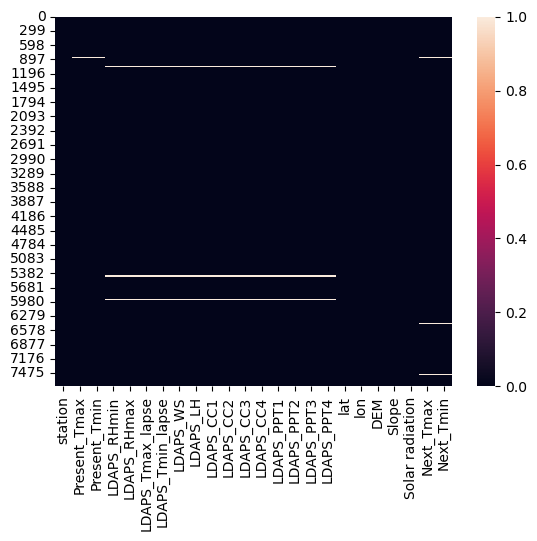

In [9]:
sns.heatmap(df.isnull())

We can visualize that missing values are present

There are null values. For simplicity, we'll just drop them instead of handling.



In [10]:
df = df.dropna()

In [11]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [12]:
df.shape

(7588, 24)

In [13]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

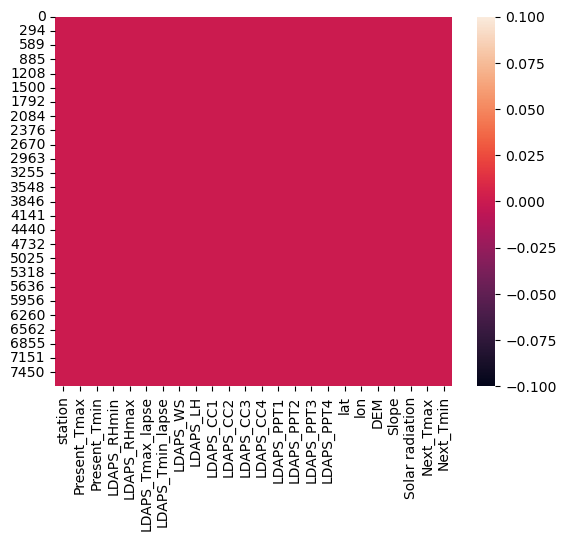

In [14]:
sns.heatmap(df.isnull())

all null values have been removed

In [15]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64


Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
            ..
58.950947    1
58.566174    1
59.790348    1
51.062355    1
22.933014    1
Name: count, Length: 7585, dtype: int64


LDAPS_RHmax
92.531029    2
88.876610    2
85.863731    2
96.525200    2
9

In [16]:
# Lets check the no. of unique value in all the columns of the dataset
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

In [17]:
# Lets check the no. of unique value in all the columns of the dataset
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

In [18]:
df["Next_Tmin"].value_counts()
     

Next_Tmin
23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
29.8      1
28.5      1
29.1      1
29.4      1
12.9      1
Name: count, Length: 157, dtype: int64

In [19]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


1.This gives the statistical summary of numerical columns.The summary of the dataset looks perfect since there is no negative or invalid values are present. 2.In this dataset count of all columns are same,which means there is no missing values are present. 3.The median(50%) is  greater than mean which means  skewness is preset 4.By summarizing the data there is diff between 75% and max Which means outliers are present. I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.

# Univariate Analysis:

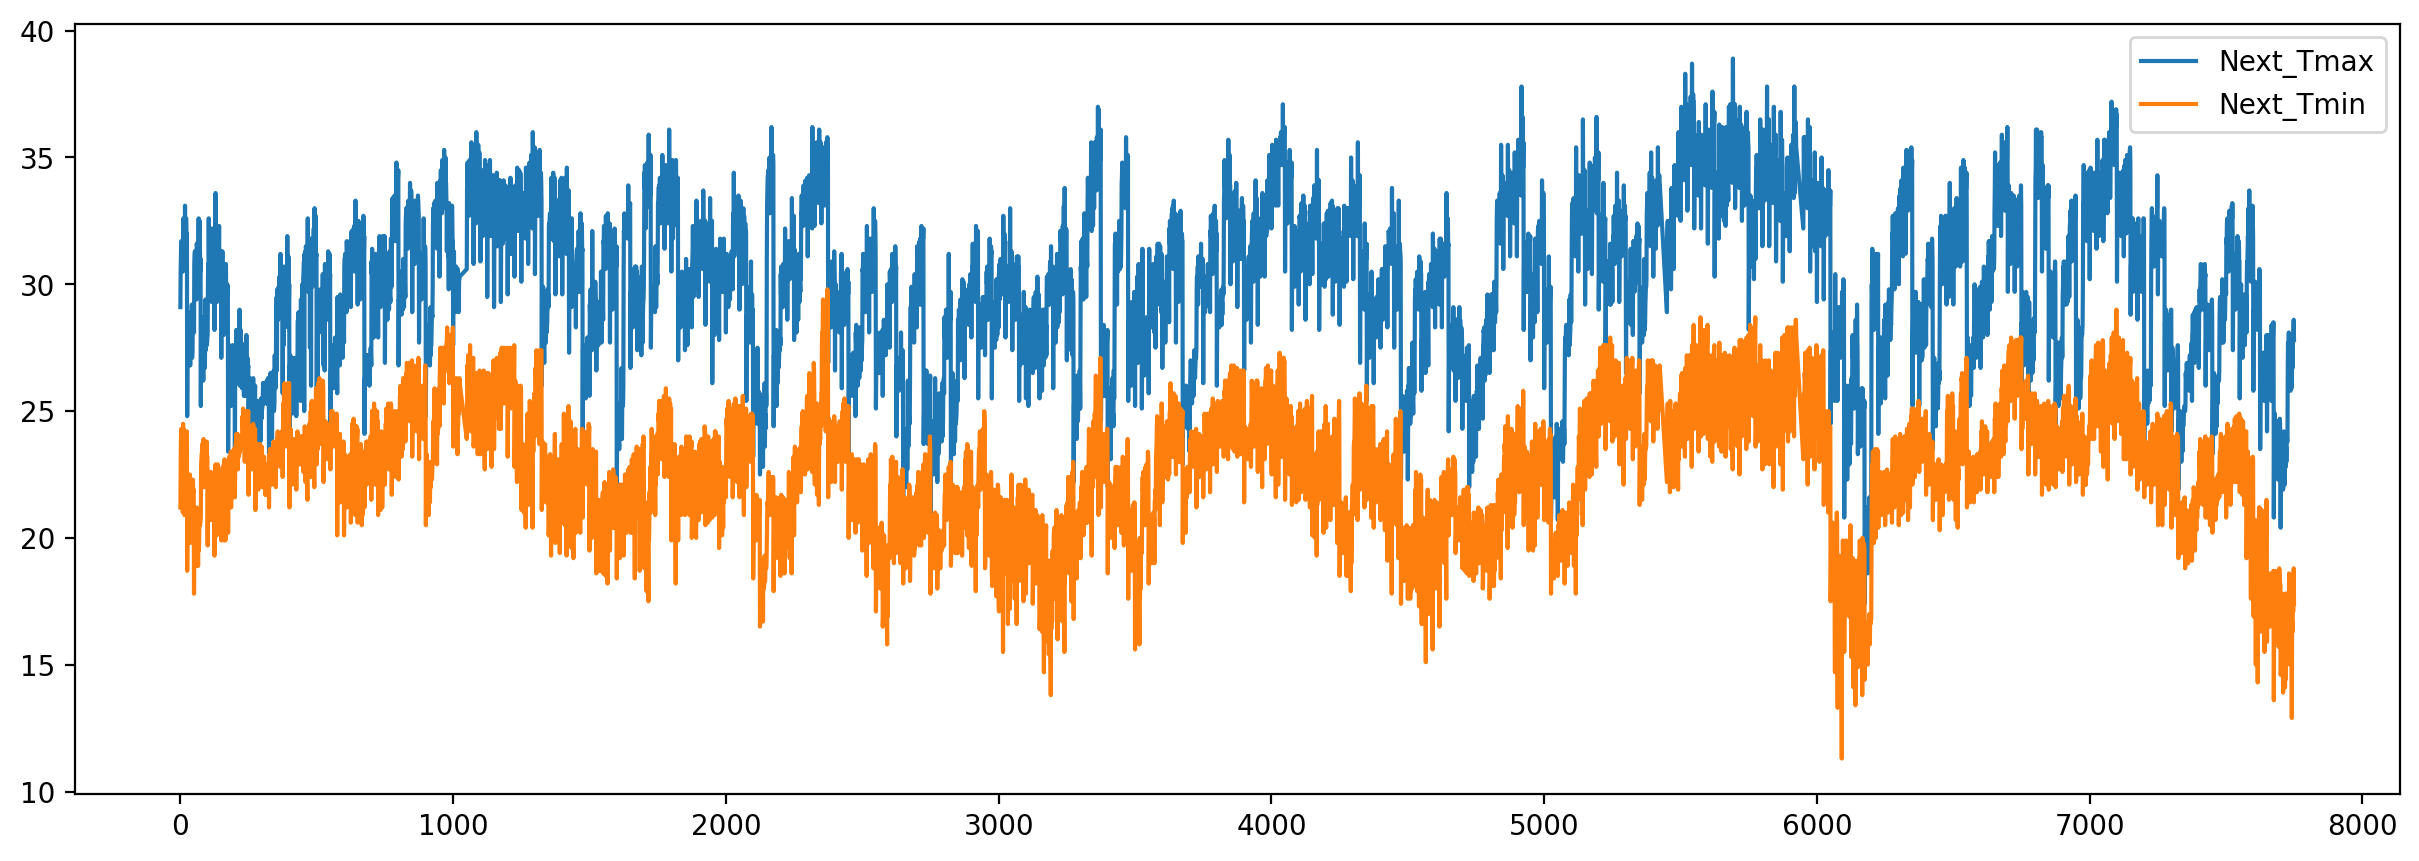

In [20]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(df["Next_Tmax"], label="Next_Tmax")
plt.plot(df["Next_Tmin"],label = "Next_Tmin")
plt.legend()
plt.show()

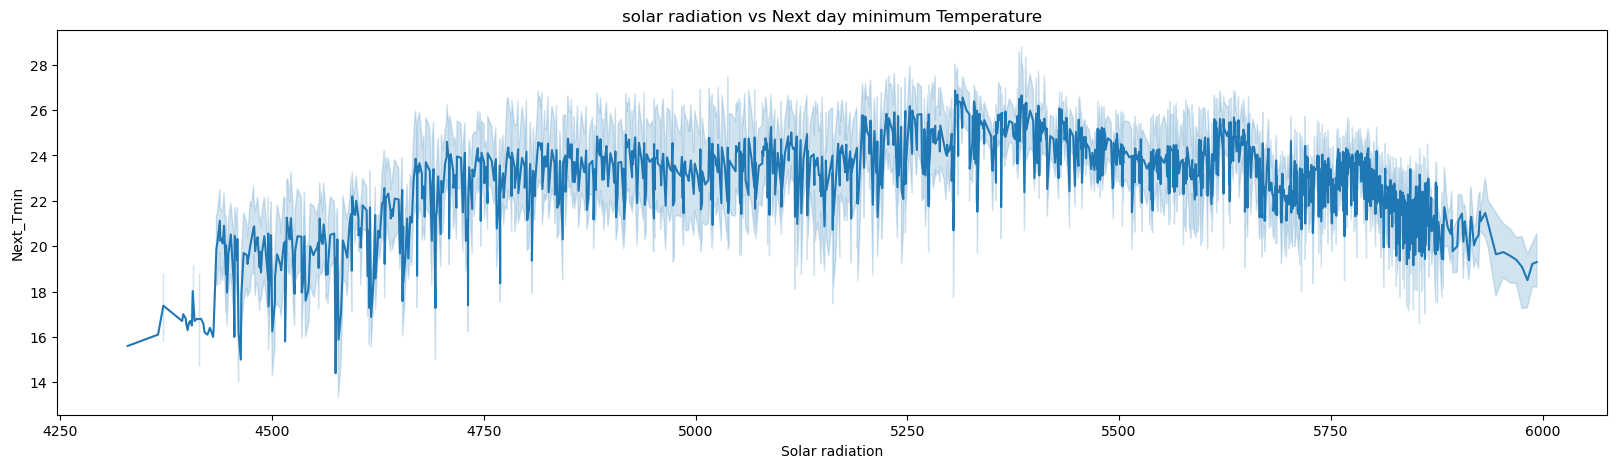

In [21]:
plt.figure(figsize=(20,5))
plt.title('solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

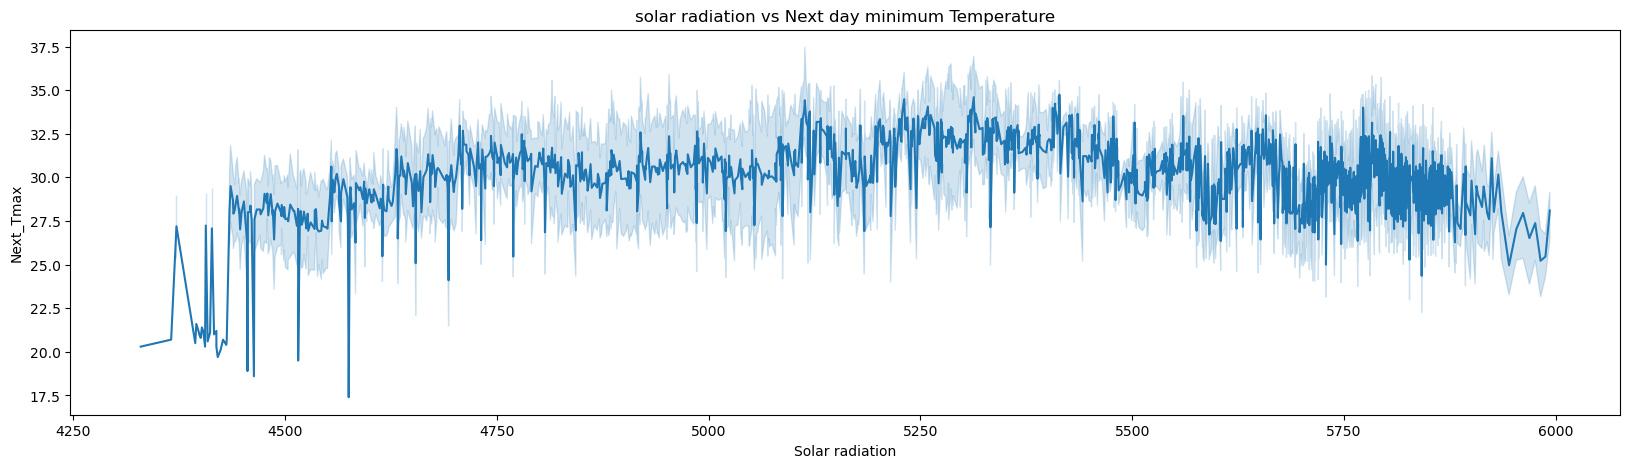

In [22]:
plt.figure(figsize=(20,5))
plt.title('solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

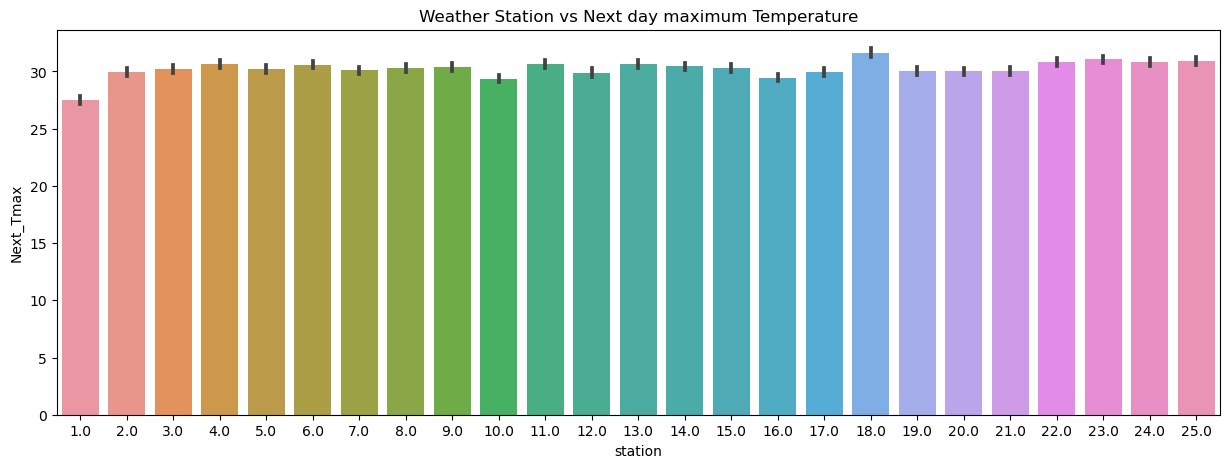

In [23]:
plt.figure(figsize=(15,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.barplot(x='station',y='Next_Tmax',data=df)
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values)

In [25]:
df.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64
 17  

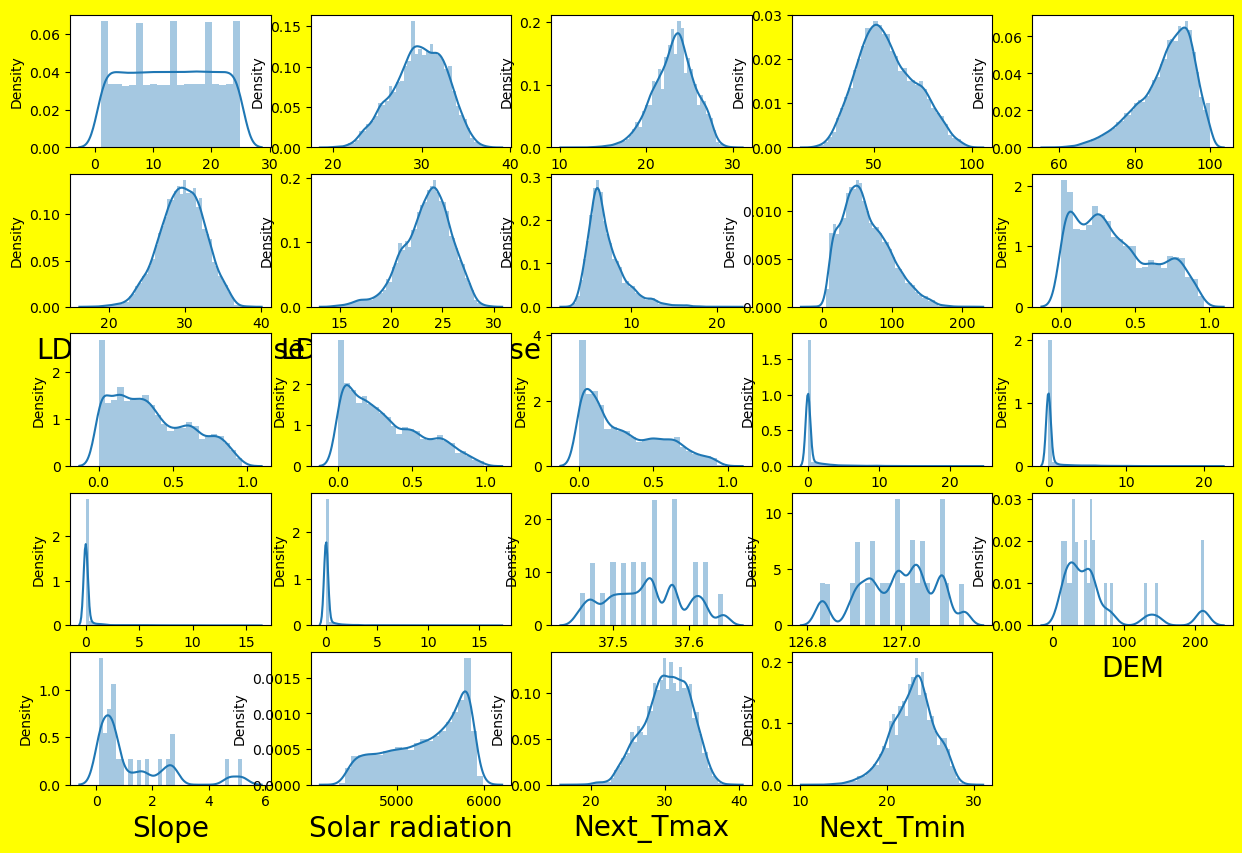

In [27]:
plt.figure(figsize = (15,10), facecolor = 'Yellow')
plotnumber = 1

for column in df:
    if plotnumber <=24:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()


# Checking for outliers

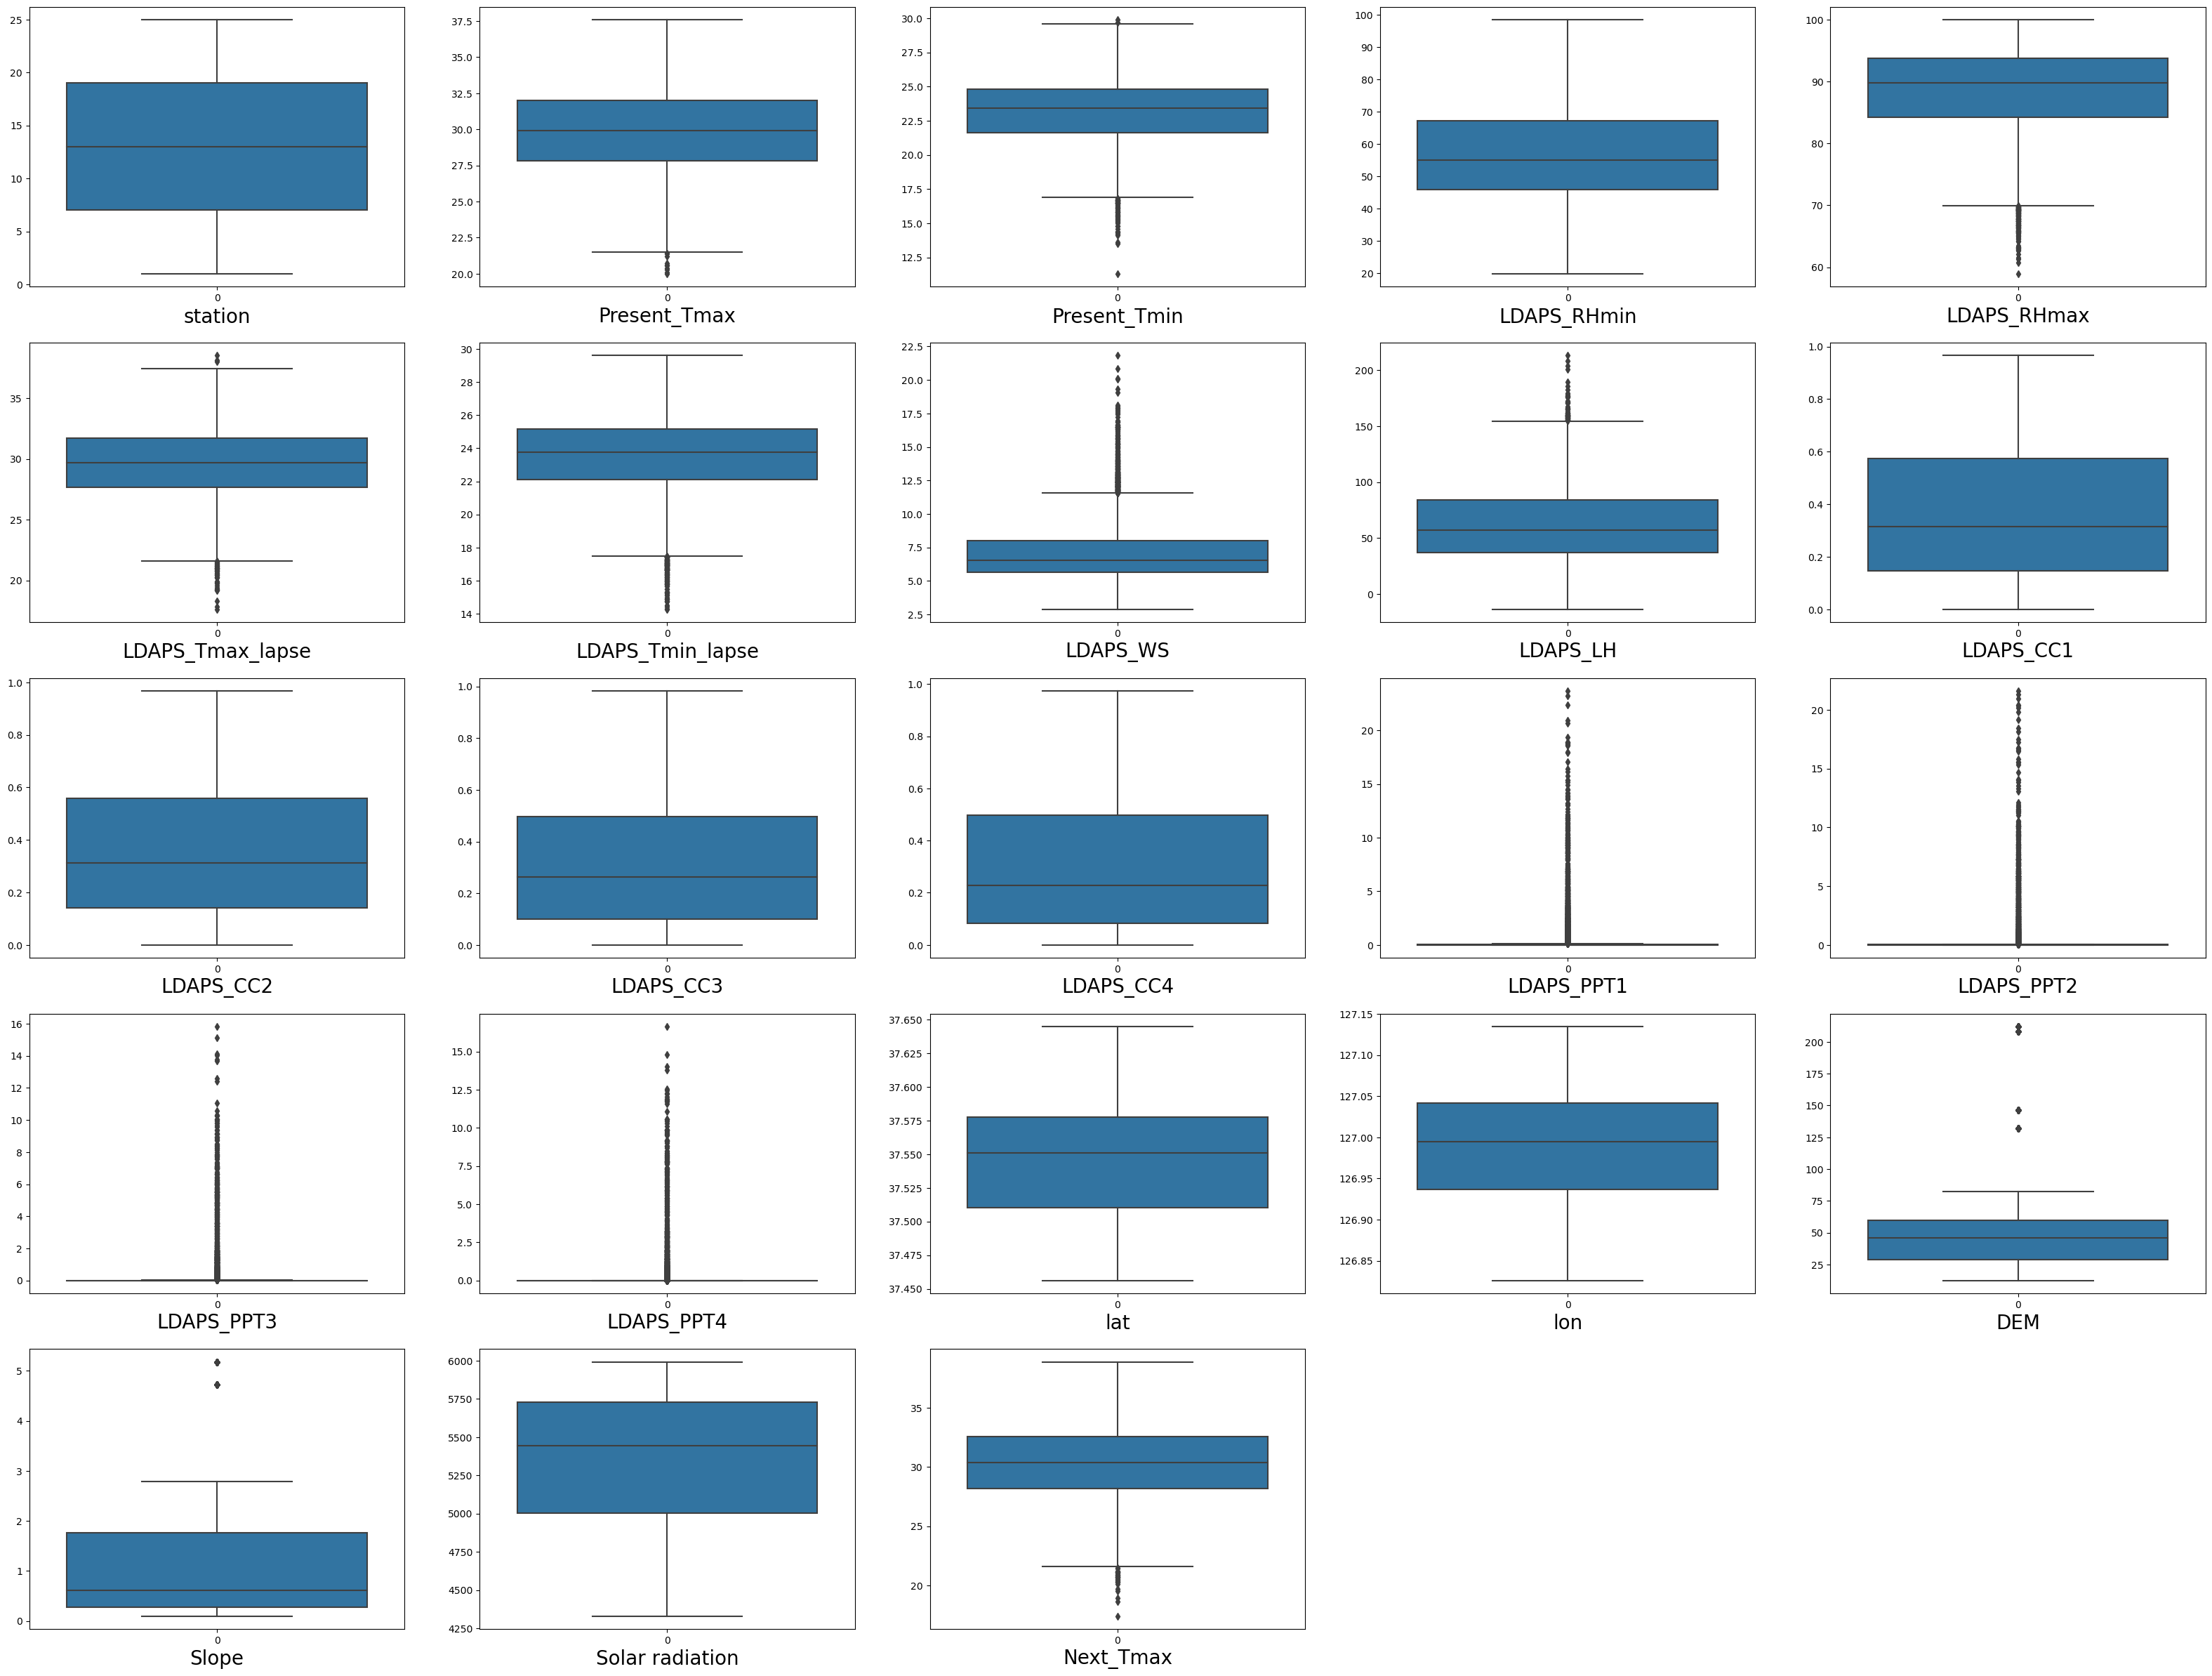

In [28]:
plt.figure(figsize=(40,30))
graph=1
for column in df:
    if graph<24:
        ax=plt.subplot(5,5,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout

In [29]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [30]:
df1=df[(z<3).all(axis=1)]

In [31]:
df1.shape

(6739, 24)

In [32]:
print("old df",df.shape)
print("new df",df1.shape)

old df (7588, 24)
new df (6739, 24)


In [33]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 11.188719030047443


# IQR

In [34]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

37.165961977749994

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_iqr.shape)

(3780, 24)


choosing ZSCORE because there is huge dataloss in IQR


In [36]:
df1.shape

(6739, 24)

# Checking for skewness

In [37]:
df1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [38]:
#Removing skewness
df1['Slope']=np.cbrt(df1['Slope'])
df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])
df1['LDAPS_CC3']=np.cbrt(df1['LDAPS_CC3'])
df1['LDAPS_CC4']=np.cbrt(df1['LDAPS_CC4'])
df1['LDAPS_WS']=np.cbrt(df1['LDAPS_WS'])
df1['LDAPS_RHmax']=np.cbrt(df1['LDAPS_RHmax'])


In [39]:
df1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.807338
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.618407
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3          -0.550622
LDAPS_CC4          -0.419106
LDAPS_PPT1          1.923134
LDAPS_PPT2          2.341898
LDAPS_PPT3          2.504981
LDAPS_PPT4          2.848397
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               0.620148
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

as we can see here skewness is removed, This best result we got cant handle can't treat more



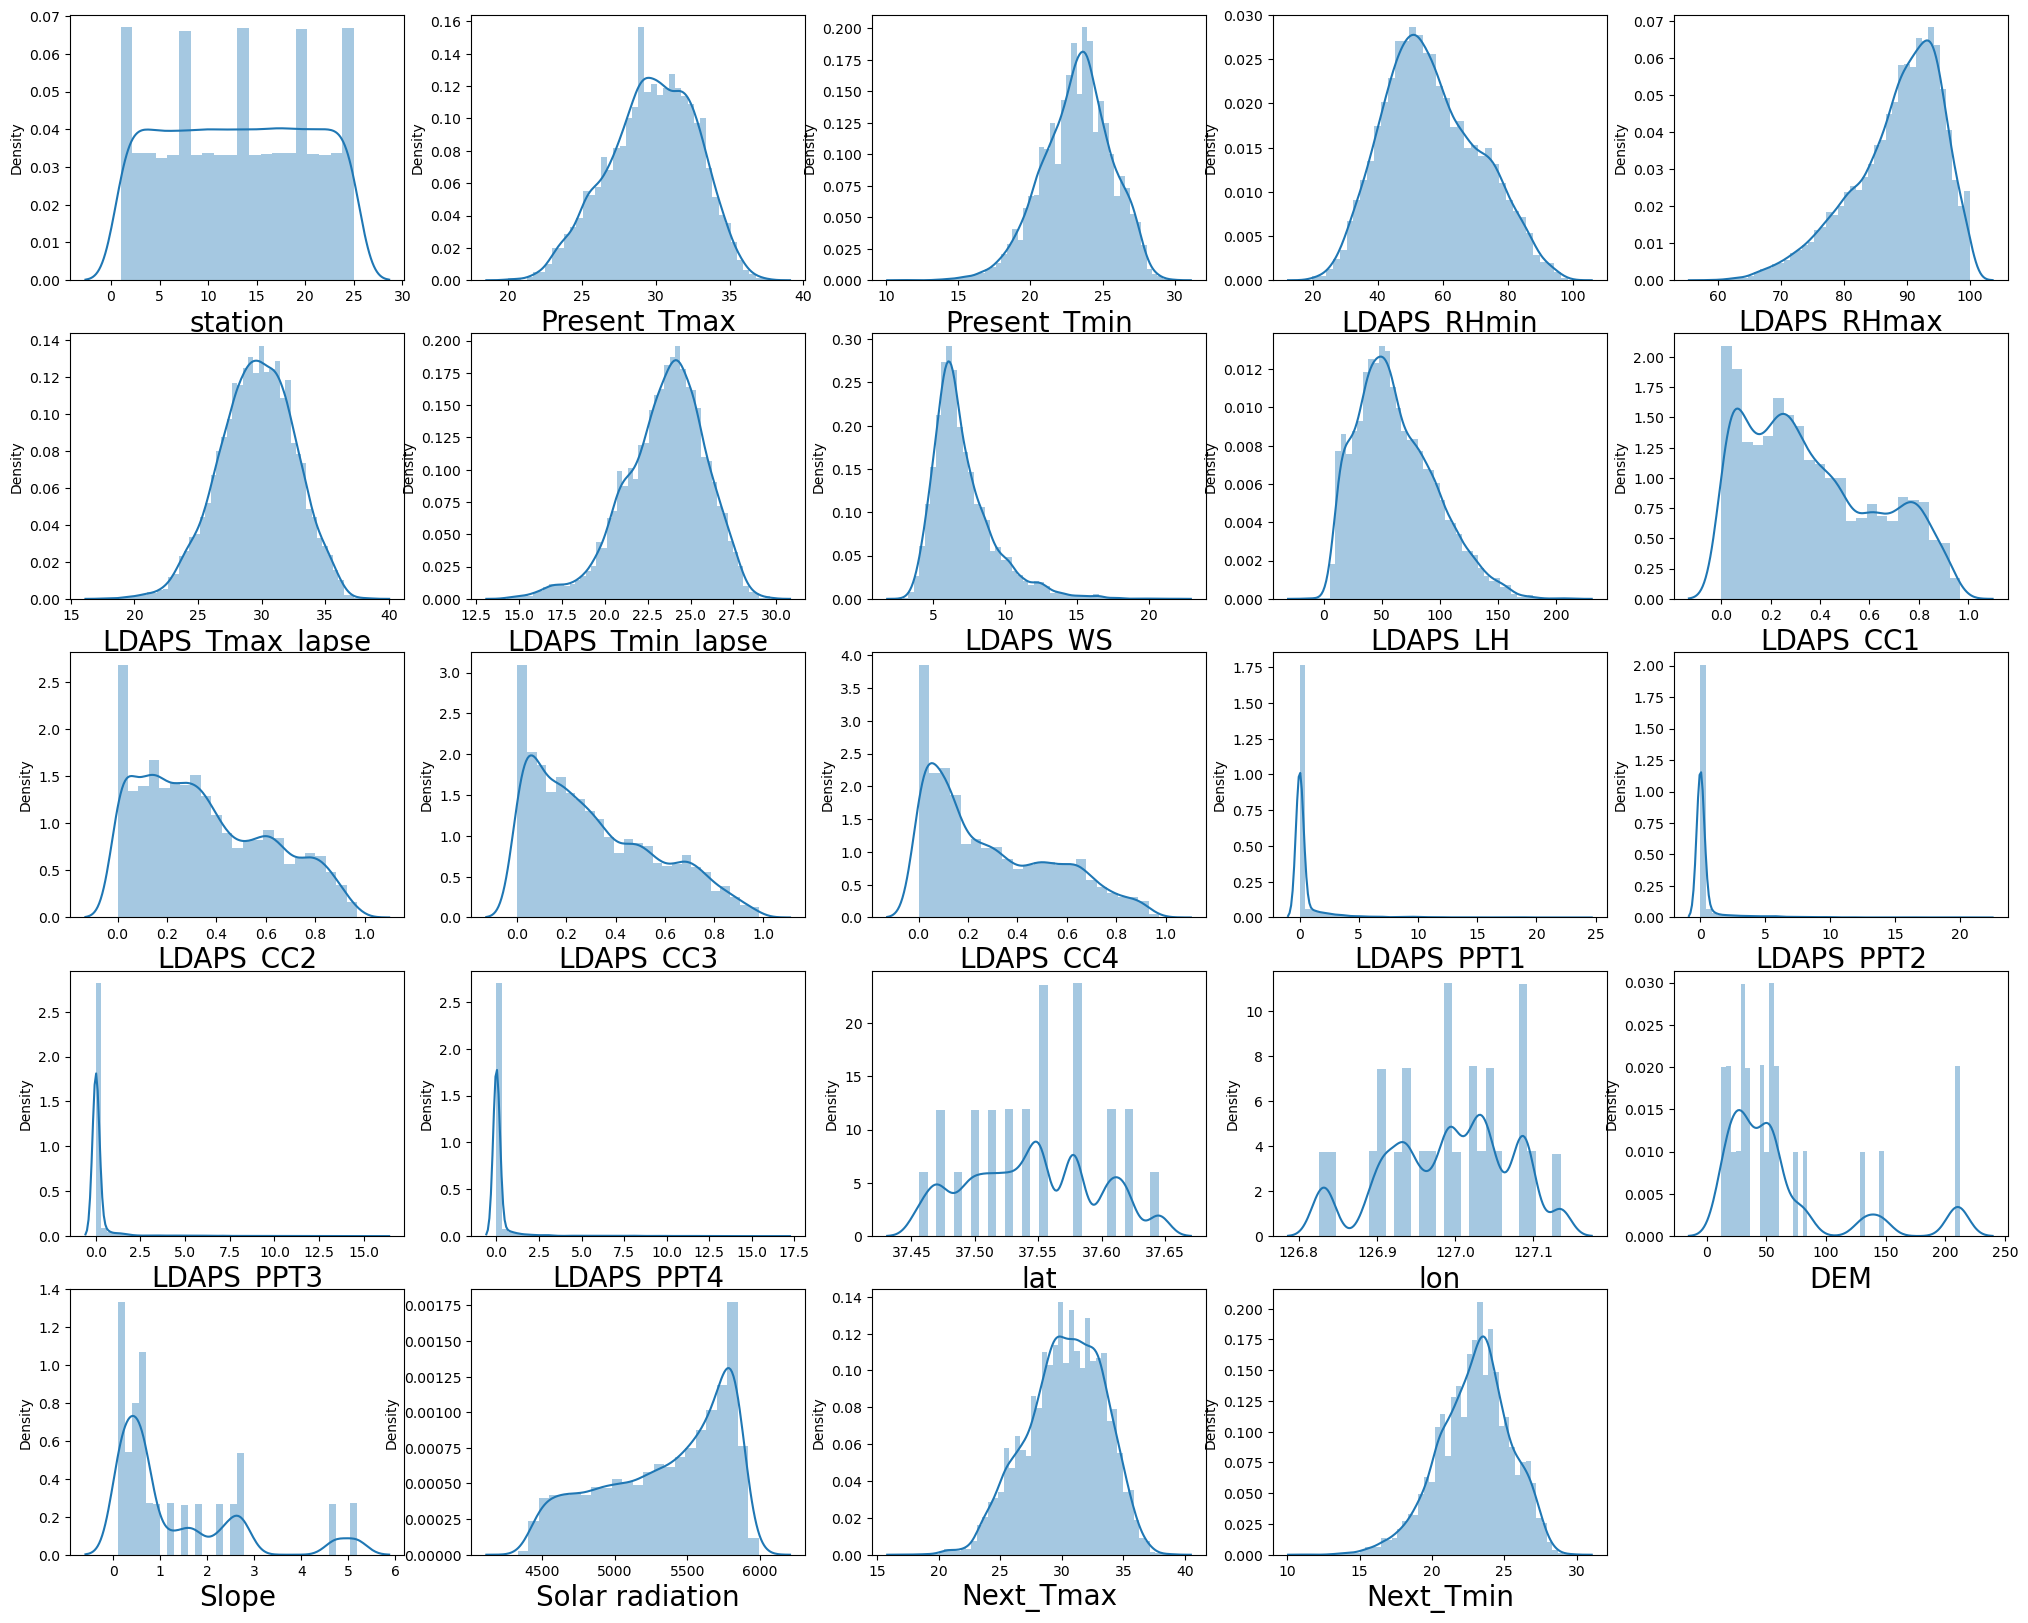

In [40]:
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df:
    if plotnumber <=24:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()


# Corelation matrix

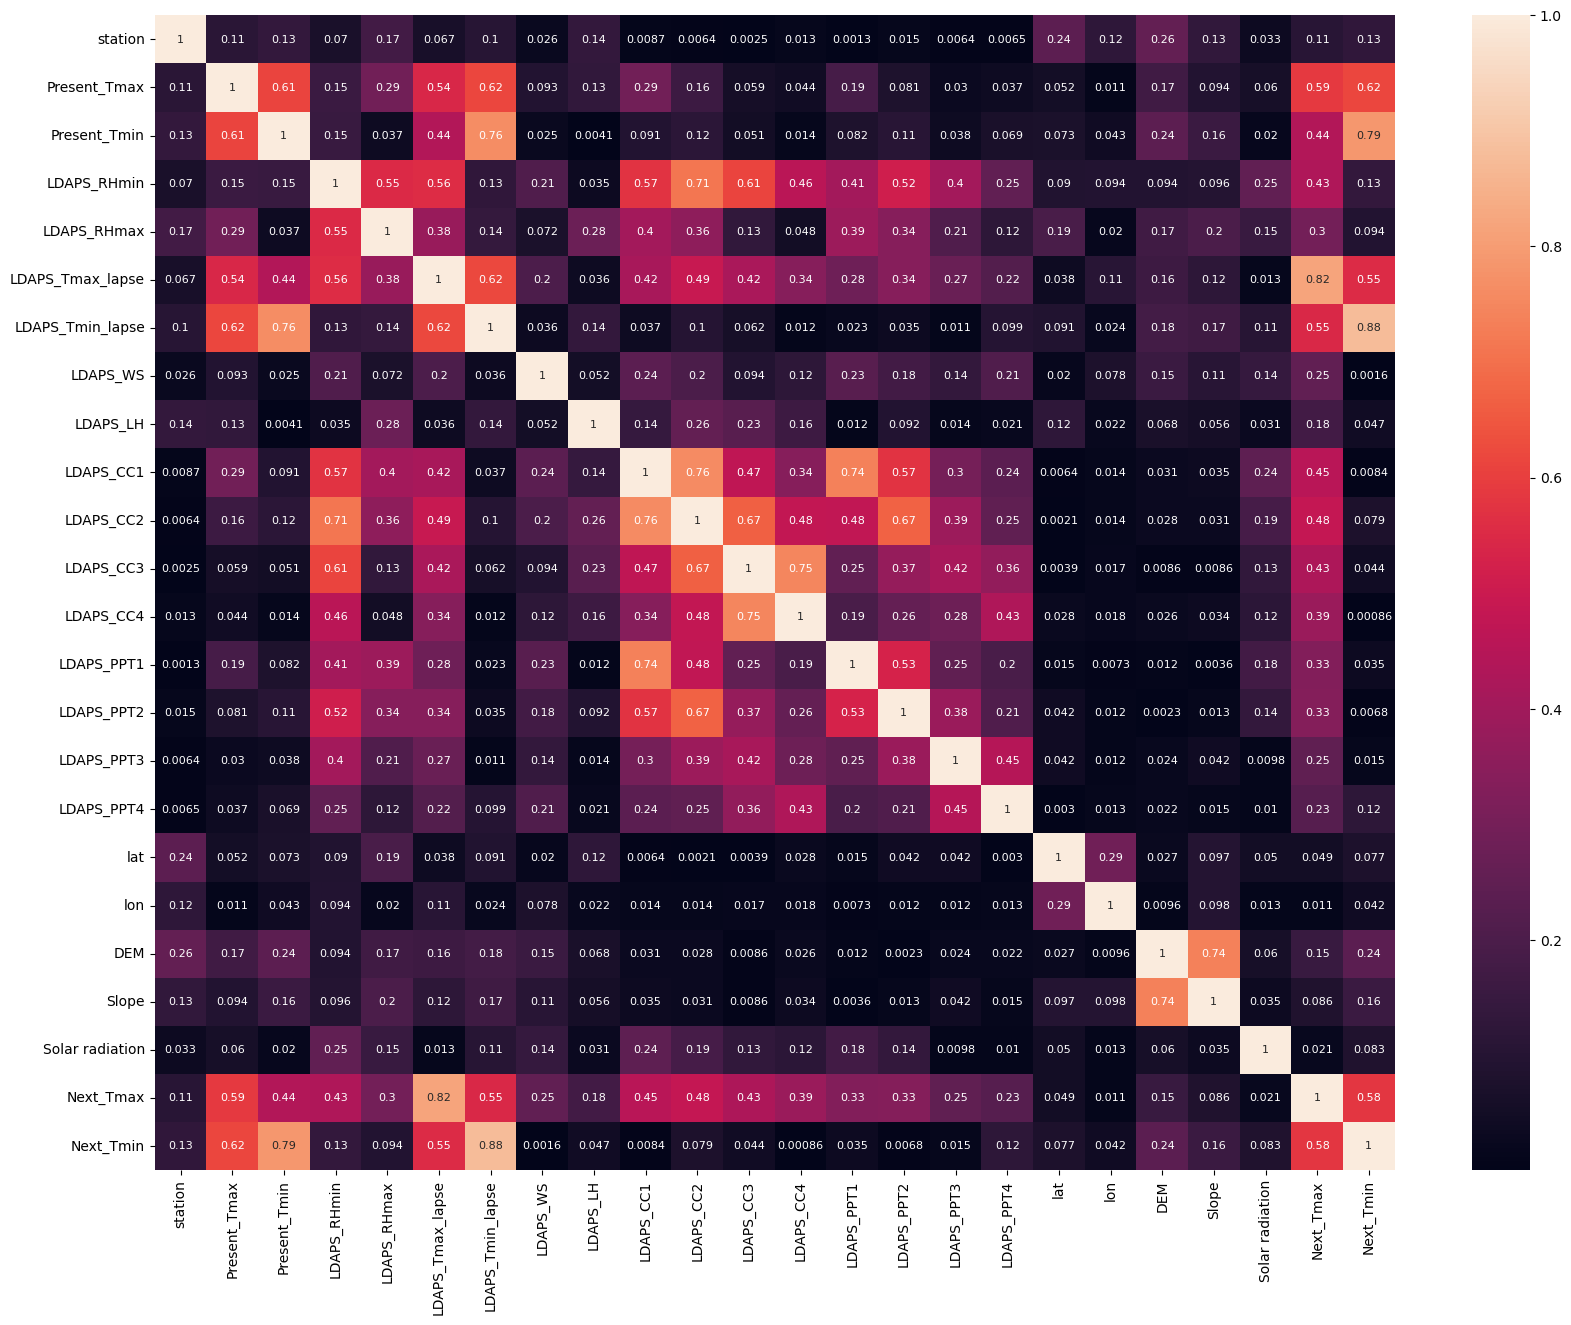

In [41]:
df1_corr=df1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df1_corr,annot=True,annot_kws={'size':8})
plt.show()

# Dividing data into Features and label

In [42]:
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

In [43]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]

In [44]:
x.shape,y1.shape,y2.shape

((7588, 22), (7588,), (7588,))

# Feature scaling using standard scalarization

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.664607,-0.353318,-0.748029,0.104660,0.382768,-0.525269,-0.215525,-0.126423,0.206603,-0.513123,...,-0.660441,-0.305589,-0.275777,-0.239969,-0.224971,1.186076,-0.005302,2.769091,1.111162,1.510565
1,-1.526052,0.725138,-0.664721,-0.305052,0.311697,0.078334,0.223368,-0.644133,-0.313359,-0.545304,...,-0.673074,-0.305589,-0.275777,-0.239969,-0.224971,1.186076,0.512280,-0.315828,-0.543220,1.222997
2,-1.387498,0.624033,0.043400,-0.549344,-0.609425,0.160080,0.449896,-0.439100,-1.244497,-0.606944,...,-0.616249,-0.305589,-0.275777,-0.239969,-0.224971,0.650626,0.840503,-0.526719,-0.723891,1.209602
3,-1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,-0.079238,-0.663353,0.096026,-0.580143,...,-0.647336,-0.305589,-0.275777,-0.239969,-0.224971,1.987268,0.386040,-0.298272,0.928888,1.194265
4,-1.110389,0.556630,-0.539758,-0.037665,0.249244,-0.171981,-0.010803,-0.624327,1.349989,-0.827872,...,-0.506152,-0.305589,-0.275777,-0.239969,-0.224971,0.117159,1.812547,-0.494848,-0.549485,1.200286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,1.106481,-2.240616,-2.247578,-2.190405,-1.402898,-0.614083,-2.223667,-0.225479,-1.569844,-1.203497,...,-1.159890,-0.305589,-0.275777,-0.239969,-0.224971,0.117159,0.613271,-0.655747,-0.500966,-2.065599
7584,1.245036,-2.442826,-2.414195,-1.820788,-0.648815,-0.990460,-2.432415,-0.609132,0.583486,-1.151793,...,-1.107407,-0.305589,-0.275777,-0.239969,-0.224971,-0.686016,1.193973,-0.735482,-0.820711,-2.098689
7585,1.383590,-2.173212,-2.539157,-2.050081,-1.318376,-1.110333,-2.021883,-0.434188,0.283984,-1.290699,...,-1.177177,-0.305589,-0.275777,-0.239969,-0.224971,-0.150566,-1.267697,-0.852919,-0.804538,-2.095175
7586,1.522145,-2.173212,-2.289232,-2.234735,-1.537141,-0.886737,-2.039881,-0.253241,-0.452772,-1.268430,...,-1.177177,-0.305589,-0.275777,-0.239969,-0.224971,-0.418291,-1.040466,-0.821476,-0.755800,-2.106671


# VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.230772,station
1,2.819412,Present_Tmax
2,3.164445,Present_Tmin
3,6.413439,LDAPS_RHmin
4,2.237400,LDAPS_RHmax
5,7.557261,LDAPS_Tmax_lapse
6,7.375374,LDAPS_Tmin_lapse
7,1.262033,LDAPS_WS
8,1.530626,LDAPS_LH
9,3.503579,LDAPS_CC1


# MODEL BUILDING:
Next_Tmax

# Finding best random state

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [49]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y1_train)
    pred=lr.predict(x_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best r2_score is",maxAccu,"at random state",maxRS)

Best r2_score is 0.7898043240072161 at random state 0
Best r2_score is 0.7902451041188772 at random state 10
Best r2_score is 0.8017703209590217 at random state 30
Best r2_score is 0.8018259021726787 at random state 43


In [50]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


# 1.Linear Regression

In [52]:
lr = LinearRegression()
lr.fit(x_train, y1_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:',r2_score(y1_test,pred_lr))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_lr))
print("mean squared error:",mean_squared_error(y1_test,pred_lr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_lr)))

LinearRegression()
R2_score: 0.8018259021726787
R2_score on training data: 77.21004992695963
Mean absolute error: 1.0720475085675656
mean squared error: 1.9932347815563238
Root mean squared error: 1.4118196703390713


# 2.Random Forest regression

In [53]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y1_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y1_test,pred_RFR))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_RFR))
print("mean squared error:",mean_squared_error(y1_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_RFR)))


RandomForestRegressor()
R2_score: 0.9037036721610907
R2_score on training data: 98.53156468802855
Mean absolute error: 0.7307913921826966
mean squared error: 0.9685483223539743
Root mean squared error: 0.984148526572069


# Ridge

In [55]:
# r= Ridge()
r.fit(x_train, y1_train)
pred_r=r.predict(x_test)
pred_train=r.predict(x_train)
print(r)
print('R2_score:',r2_score(y1_test,pred_r))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_r))
print("mean squared error:",mean_squared_error(y1_test,pred_r))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_r)))


Ridge()
R2_score: 0.8018291641399391
R2_score on training data: 77.2100397943387
Mean absolute error: 1.072031221793434
mean squared error: 1.9932019726944645
Root mean squared error: 1.4118080509383932


# Decision Tree

In [56]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y1_train)
pred_dt=dt.predict(x_test)
pred_train=lr.predict(x_train)
print(dt)
print('R2_score:',r2_score(y1_test,pred_dt))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_dt))
print("mean squared error:",mean_squared_error(y1_test,pred_dt))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_dt)))


DecisionTreeRegressor()
R2_score: 0.7928409296908028
R2_score on training data: 77.21004992695963
Mean absolute error: 1.0310496267018006
mean squared error: 2.083605621431708
Root mean squared error: 1.4434699932564266


# Cross validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
score1=cross_val_score(lr,x,y1,cv=5,scoring='r2')
print("score1")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_lr)-score1.mean())*100)

score1
0.7216067545539034
Diff between r2_score and cross validation- 8.021914761877525


In [59]:
#cross validation of Random Forest
score=cross_val_score(RFR,x,y1,cv=5,scoring='r2')
print("score")
print(score.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_RFR)-score.mean())*100)

score
0.6938781176005648
Diff between r2_score and cross validation- 20.982555456052587


In [61]:
score3=cross_val_score(r,x,y1,cv=5,scoring='r2')
print("score3")
print(score3.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_r)-score3.mean())*100)

score3
0.7216252647994248
Diff between r2_score and cross validation- 8.02038993405143


In [62]:
score5=cross_val_score(dt,x,y1,cv=5,scoring='r2')
print("score5")
print(score5.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_dt)-score5.mean())*100)

score5
0.44064777789291376
Diff between r2_score and cross validation- 35.2193151797889


The diff between r2 score and cross validation is less in Ridge.So,iam selectiong ridge for model building

# Hyper Parameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [64]:
Rd=Ridge()

grid= GridSearchCV(Ridge(), parameters, cv=5)
grid.fit(x_train, y1_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'max_iter': [0, 10, 20], 'random_state': [15, 16, 17],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [65]:
grid.best_params_

{'max_iter': 20, 'random_state': 16, 'solver': 'sag'}

In [67]:
Final_model=Ridge(max_iter=20,random_state=16,solver='sag')
Final_model.fit(x_train,y1_train)
pred=Final_model.predict(x_test)
print('R2_Score:',r2_score(y1_test,pred)*100)

R2_Score: 80.18287381324107


Saving model in pickle

In [69]:
import joblib
import pickle
fname="Temperature_Tmax.pkl"

In [70]:
pickle.dump(Final_model,open(fname,'wb'))

In [71]:
loaded_model=pickle.load(open('Temperature_Tmax.pkl','rb'))
result=loaded_model.score(x_test,y1_test)
print(result*100)

80.18287381324107


In [72]:
Result=pd.DataFrame([loaded_model.predict(x_test)[:],y1_test[:]],index=["predicted","origional"])
Result

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
predicted,28.769502,29.304063,29.841549,29.50101,31.529035,29.075917,29.205275,25.165943,26.464467,27.901476,...,27.945802,26.072465,32.005587,32.908355,34.239076,25.42902,28.367848,32.041829,34.227777,32.603391
origional,28.200000,29.700000,34.200000,29.20000,32.100000,29.600000,28.900000,25.900000,26.600000,26.400000,...,27.800000,25.600000,33.000000,32.700000,33.000000,26.10000,28.800000,30.000000,32.000000,29.100000


# With Next_Tmin


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8571244969955574  on Random_state  103


In [76]:
# spiliting data 75% train and 25% for test
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

# 1.Linear Regression

In [77]:
lr = LinearRegression()
lr.fit(x_train, y2_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:',r2_score(y2_test,pred_lr))
print("R2_score on training data:",r2_score(y2_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y2_test,pred_lr))
print("mean squared error:",mean_squared_error(y2_test,pred_lr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred_lr)))

LinearRegression()
R2_score: 0.8571244969955574
R2_score on training data: 82.83352286323816
Mean absolute error: 0.7412968361139208
mean squared error: 0.9132317200576587
Root mean squared error: 0.9556315817602821


# 2.Random Forest

In [79]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y2_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y2_test,pred_RFR))
print("R2_score on training data:",r2_score(y2_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y2_test,pred_RFR))
print("mean squared error:",mean_squared_error(y2_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred_RFR)))


RandomForestRegressor()
R2_score: 0.9191637281950942
R2_score on training data: 98.60281056473013
Mean absolute error: 0.5471386399578283
mean squared error: 0.516689327358988
Root mean squared error: 0.7188110512220774


# Decision Tree

In [80]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y2_train)
pred_dt=dt.predict(x_test)
pred_train=lr.predict(x_train)
print(dt)
print('R2_score:',r2_score(y2_test,pred_dt))
print("R2_score on training data:",r2_score(y2_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y2_test,pred_dt))
print("mean squared error:",mean_squared_error(y2_test,pred_dt))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred_dt)))


DecisionTreeRegressor()
R2_score: 0.8024749298407445
R2_score on training data: 82.83352286323816
Mean absolute error: 0.8247759620453347
mean squared error: 1.2625408539799683
Root mean squared error: 1.123628432347619


# Bagging

In [81]:
b= BaggingRegressor()
b.fit(x_train, y2_train)
pred_b=b.predict(x_test)
pred_train=b.predict(x_train)
print(b)
print('R2_score:',r2_score(y2_test,pred_b))
print("R2_score on training data:",r2_score(y2_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y2_test,pred_b))
print("mean squared error:",mean_squared_error(y2_test,pred_b))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred_b)))

BaggingRegressor()
R2_score: 0.9067220960656833
R2_score on training data: 97.93675924693387
Mean absolute error: 0.588713758566157
mean squared error: 0.5962137585661573
Root mean squared error: 0.7721487930225348


# Gradient boosting regressor

In [82]:
gb=GradientBoostingRegressor()
gb.fit(x_train, y2_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print(dt)
print('R2_score:',r2_score(y2_test,pred_gb))
print("R2_score on training data:",r2_score(y2_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y2_test,pred_gb))
print("mean squared error:",mean_squared_error(y2_test,pred_gb))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred_gb)))

DecisionTreeRegressor()
R2_score: 0.9029709150936779
R2_score on training data: 90.15546609558565
Mean absolute error: 0.6179007596402746
mean squared error: 0.6201905592022017
Root mean squared error: 0.7875217833191674


# Cross validation

In [83]:
score1=cross_val_score(lr,x,y2,cv=5,scoring='r2')
print("score1")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y2_test,pred_lr)-score1.mean())*100)

score1
0.7841382045554045
Diff between r2_score and cross validation- 7.298629244015286


In [84]:
#cross validation of Random Forest
score=cross_val_score(RFR,x,y2,cv=5,scoring='r2')
print("score")
print(score.mean())
print("Diff between r2_score and cross validation-",(r2_score(y2_test,pred_RFR)-score.mean())*100)

score
0.7814298443049207
Diff between r2_score and cross validation- 13.773388389017349


In [87]:
score2=cross_val_score(dt,x,y2,cv=5,scoring='r2')
print("score2")
print(score2.mean())
print("Diff between r2_score and cross validation-",(r2_score(y2_test,pred_dt)-score2.mean())*100)

score2
0.5731477675304306
Diff between r2_score and cross validation- 22.932716231031392


In [88]:
score3=cross_val_score(b,x,y2,cv=5,scoring='r2')
print("score3")
print(score5.mean())
print("Diff between r2_score and cross validation-",(r2_score(y2_test,pred_b)-score3.mean())*100)

score3
0.7624410256379838
Diff between r2_score and cross validation- 14.217940119582673


In [90]:
score5=cross_val_score(gb,x,y2,cv=5,scoring='r2')
print("score5")
print(score5.mean())
print("Diff between r2_score and cross validation-",(r2_score(y2_test,pred_gb)-score5.mean())*100)

score5
0.7996018635805537
Diff between r2_score and cross validation- 10.336905151312415


# The differee between r2 score and cross validation is less in linear regression so iam using linear regression

# Hyper Parameter Tuning

In [91]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

In [92]:
grid= GridSearchCV(LinearRegression(), parameters, cv=5)
grid.fit(x_train, y2_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True], 'n_jobs': [-1]})

In [93]:
grid.best_params_  

{'fit_intercept': True, 'n_jobs': -1}

In [95]:
Final_model=LinearRegression(fit_intercept=True,n_jobs=-1)
Final_model.fit(x_train,y2_train)
pred=Final_model.predict(x_test)
print('R2_Score:',r2_score(y2_test,pred)*100)

R2_Score: 85.71244969955573


# Saving the model

In [96]:
import joblib
import pickle
fname="Temperature_Tmin.pkl"

In [97]:
pickle.dump(Final_model,open(fname,'wb'))

In [98]:
loaded_model=pickle.load(open('Temperature_Tmin.pkl','rb'))
result=loaded_model.score(x_test,y2_test)
print(result*100)

85.71244969955573


In [99]:
Result=pd.DataFrame([loaded_model.predict(x_test)[:],y2_test[:]],index=["predicted","origional"])
Result

,0,1,2,3,4,5,6,7,8,9,...,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896
predicted,21.210167,25.283952,18.708438,25.820297,22.631122,22.742624,23.718018,25.266794,21.181208,26.373099,...,19.222795,22.567524,23.7414,24.972384,23.07924,23.387588,24.121883,16.607501,24.265305,20.76069
origional,21.700000,25.000000,19.400000,26.000000,21.800000,22.100000,23.500000,25.600000,20.000000,26.200000,...,19.000000,22.300000,24.7000,23.800000,22.30000,25.200000,22.100000,18.200000,24.400000,22.70000
